In [38]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [39]:
%matplotlib inline

# 1d case

In [40]:
fs_ID = []
fs_IS_100 = []
fs_IS_200 = []
fs_IS_400 = []
fs_IS_800 = []
fs_IS_1600 = []
fs_IS_3200 = []

for n in range(6):
    fs_ID.append(h5py.File(f'IS/PureShear/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
fss = [fs_ID, fs_IS_100, fs_IS_200, fs_IS_400, fs_IS_800, fs_IS_1600, fs_IS_3200]

for p in range(len(fss)-1):
    for n in range(6):
        fss[p+1].append(h5py.File(f'IS/PureShear/Shear/scaling/'+str(100*2**p)+f'/data_serial_TIx_{n}.hdf5', 'r'))



In [41]:
fss

[[<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>],
 [<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>],
 [<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>],
 [<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "dat

In [42]:
for fs in fss:
    print(fs[0]['Primitive/pi11'].shape)

(400,)
(100,)
(200,)
(400,)
(800,)
(1600,)
(3200,)


In [43]:
# eta = fs_IS[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_IS[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_IS[0]['Domain'].attrs['dt'][0]}")

In [44]:
# eta = fs_ISCE[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_ISCE[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_ISCE[0]['Domain'].attrs['dt'][0]}")

In [45]:
for fs in fss:
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
          f"relaxation time {tau_pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0005
Dissipation strength 0.01, relaxation time 0.1, timestep 0.002
Dissipation strength 0.01, relaxation time 0.1, timestep 0.001
Dissipation strength 0.01, relaxation time 0.1, timestep 0.0005
Dissipation strength 0.01, relaxation time 0.1, timestep 0.00025
Dissipation strength 0.01, relaxation time 0.1, timestep 0.000125
Dissipation strength 0.01, relaxation time 0.1, timestep 6.25e-05


In [46]:
for fs in fss:
    print(fs[-1].attrs['t'])


[6.]
[6.]
[6.]
[6.]
[6.]
[6.]
[6.]


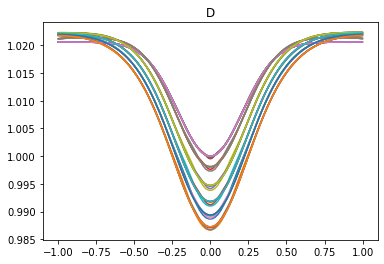

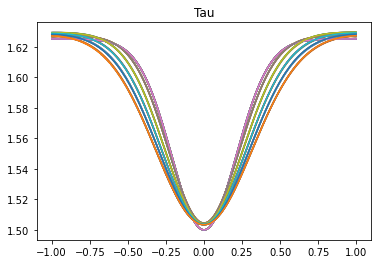

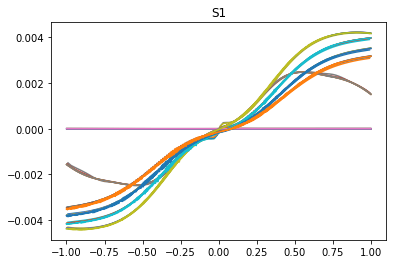

In [47]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for fs in fss:
        for f in fs:
            plt.plot(f['Domain/x'], f['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.title(quant)
        #plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


In [48]:
# for quant in['D','Tau','S1']:
#     plt.figure()
#     for n in range(len(fs_IS)):
#         #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs_IS[n]['Domain/x'], (fs_IS[n]['Conserved/'+quant][:] - fs_ISCE[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.title(quant)
#     plt.legend()
#     plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
#     plt.show()

INITIAL DATA


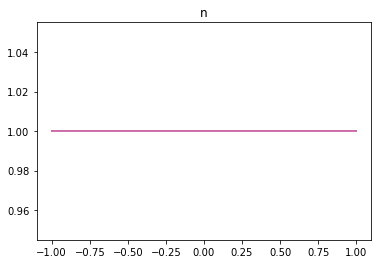

<Figure size 432x288 with 0 Axes>

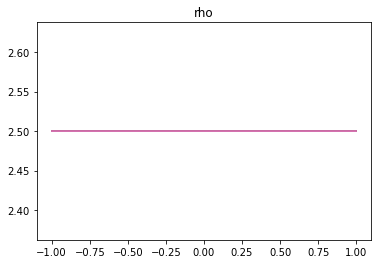

<Figure size 432x288 with 0 Axes>

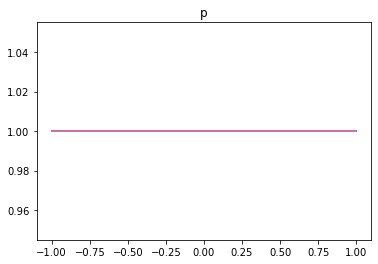

<Figure size 432x288 with 0 Axes>

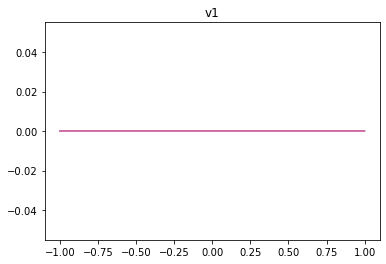

<Figure size 432x288 with 0 Axes>

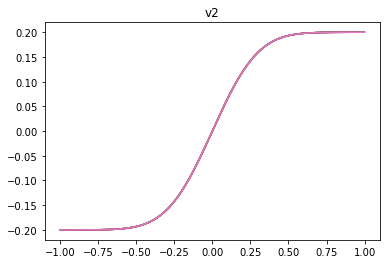

<Figure size 432x288 with 0 Axes>

In [49]:
print("INITIAL DATA")
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    for fs in fss:
        plt.plot(fs[0]['Domain/x'], fs[0]['Primitive/'+quant][:])#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    #plt.legend()
    plt.show()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


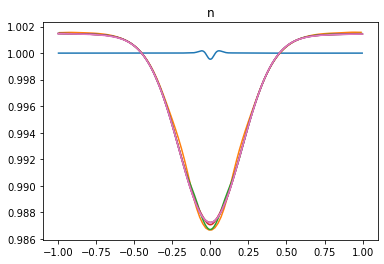

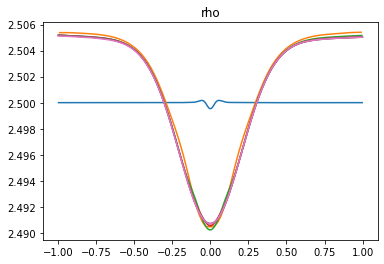

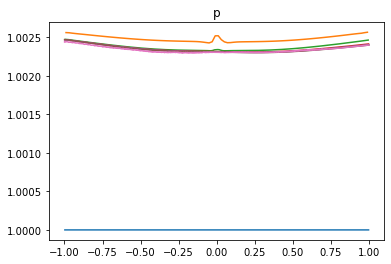

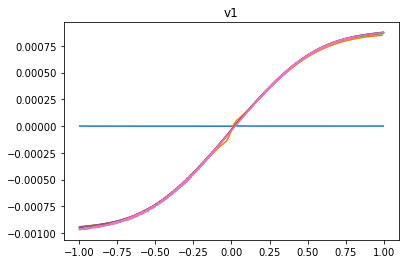

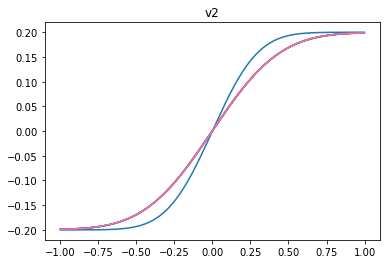

In [50]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    for fs in fss:
        plt.plot(fs[-1]['Domain/x'], fs[-1]['Primitive/'+quant][:])
    plt.title(quant)
    #plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


In [51]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Auxiliary/'+quant+'NS'][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' , '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

NameError: name 'fs_IS' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

In [ ]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
